In [2]:
import warnings
from numba import NumbaDeprecationWarning
warnings.filterwarnings("ignore", category=NumbaDeprecationWarning)

import numpy as np # linear algebra
import pandas as pd

# Data Standardization and Encoding
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Modelling
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, GridSearchCV

# Visualization Library, matplotlib and seaborn
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Hide convergence warning for now
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Oversampling technique
from imblearn.over_sampling import SMOTE

# Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif

# Random Forest
from sklearn.linear_model import LogisticRegression

# XGBoost 
from xgboost import XGBClassifier

# Random Search for Hyperparameter Turning
from sklearn.model_selection import RandomizedSearchCV

# Additional packages
from pandas.api.types import is_numeric_dtype
from scipy.stats import randint as sp_randint

# Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif

# Model Explanation
import shap
from sklearn.inspection import permutation_importance

# Data Encoder and Scaler
import category_encoders as encoders
from sklearn.preprocessing import LabelEncoder, RobustScaler
from scipy.stats import uniform, randint

/Users/saahil/Desktop/Coding_Projects/ML/Steel Plate/env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
df_train = pd.read_csv('playground-series-s4e3/train.csv')
df_test = pd.read_csv('playground-series-s4e3/test.csv')


print('Train data set : {}'.format(df_train.shape))
print('Test data set : {}'.format(df_test.shape))



Train data set : (19219, 35)
Test data set : (12814, 28)


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [8]:
df_train.describe()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,19219.000000,19219.000000,19219.000000,1.921900e+04,1.921900e+04,19219.000000,19219.000000,19219.000000,1.921900e+04,19219.000000,...,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,9609.000000,709.854675,753.857641,1.849756e+06,1.846605e+06,1683.987616,95.654665,64.124096,1.918467e+05,84.808419,...,0.102742,-0.138382,0.571902,0.076279,0.059837,0.178573,0.029554,0.025235,0.247828,0.341225
std,5548.191747,531.544189,499.836603,1.903554e+06,1.896295e+06,3730.319865,177.821382,101.054178,4.420247e+05,28.800344,...,0.487681,0.120344,0.332219,0.265450,0.237190,0.383005,0.169358,0.156844,0.431762,0.474133
min,0.000000,0.000000,4.000000,6.712000e+03,6.724000e+03,6.000000,2.000000,1.000000,2.500000e+02,0.000000,...,-0.988400,-0.885000,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4804.500000,49.000000,214.000000,6.574680e+05,6.575020e+05,89.000000,15.000000,14.000000,9.848000e+03,70.000000,...,-0.272700,-0.192500,0.253200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9609.000000,777.000000,796.000000,1.398169e+06,1.398179e+06,168.000000,25.000000,23.000000,1.823800e+04,90.000000,...,0.111100,-0.142600,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14413.500000,1152.000000,1165.000000,2.368032e+06,2.362511e+06,653.000000,64.000000,61.000000,6.797800e+04,105.000000,...,0.529400,-0.084000,0.999400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,19218.000000,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,7553.000000,903.000000,1.159141e+07,196.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df_train.head(10)

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1
5,5,1009,1033,899231,899307,409,22,26,47513,86,...,0.5909,-0.1890,0.8749,0,0,0,0,0,0,1
6,6,596,607,739072,7390760,204,21,21,22478,89,...,0.3158,-0.1497,0.5212,0,0,0,0,0,1,0
7,7,1673,1687,294065,294091,571,38,57,53142,77,...,0.0357,-0.2661,0.9408,1,0,0,0,0,0,0
8,8,507,521,203252,203261,101,25,12,12530,124,...,-0.6667,0.0305,0.3601,0,0,0,0,0,0,0
9,9,893,907,1341292,1341296,54,6,15,7052,87,...,0.4667,-0.1228,0.1400,0,0,0,0,0,1,0


In [10]:
numerical = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas']
print('No. of numerical features : {}'.format(len(numerical)))

target = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains','Dirtiness', 'Bumps', 'Other_Faults']
print('No. of targets : {}'.format(len(target)))


No. of numerical features : 27
No. of targets : 7


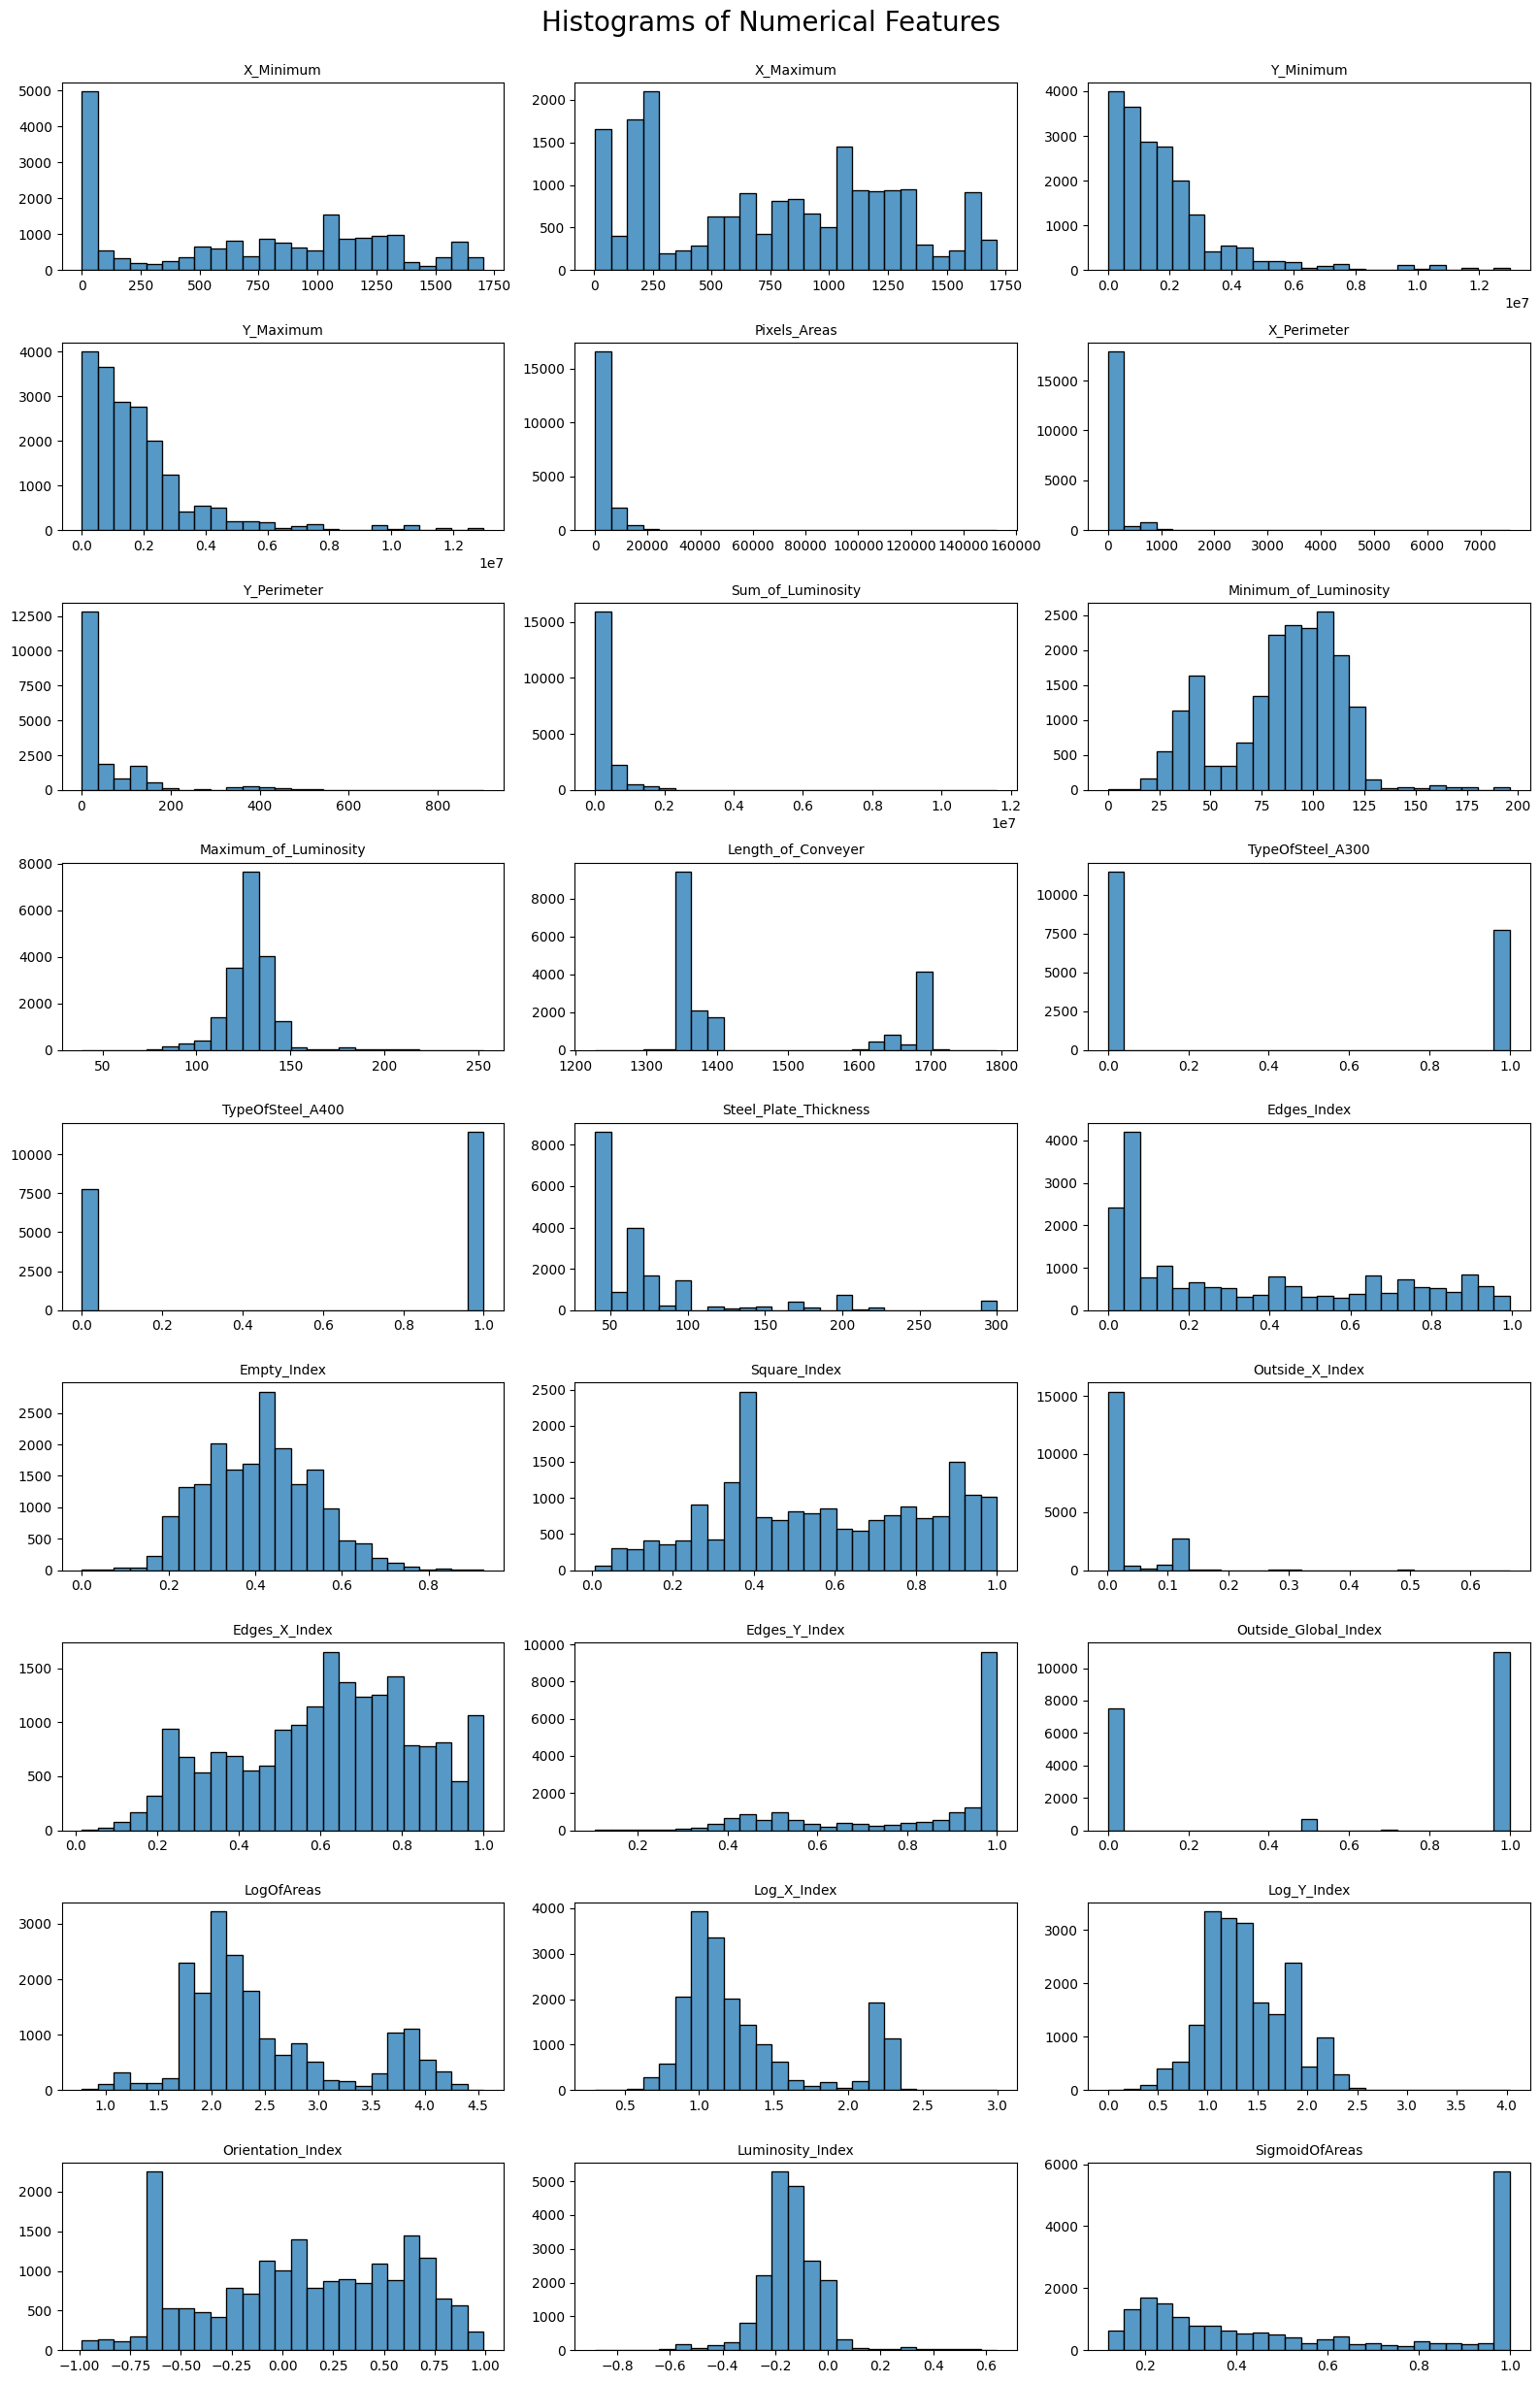

In [11]:
df_train.replace([np.inf, -np.inf], np.nan, inplace=True)

# Histograms for numerical features
fig, axes = plt.subplots(9, 3, figsize=(16, 25))
fig.suptitle('Histograms of Numerical Features', fontsize=20)

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(numerical):
    sns.histplot(data=df_train, x=col, bins=25, ax=axes[i])
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hide any unused subplots
for j in range(len(numerical), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

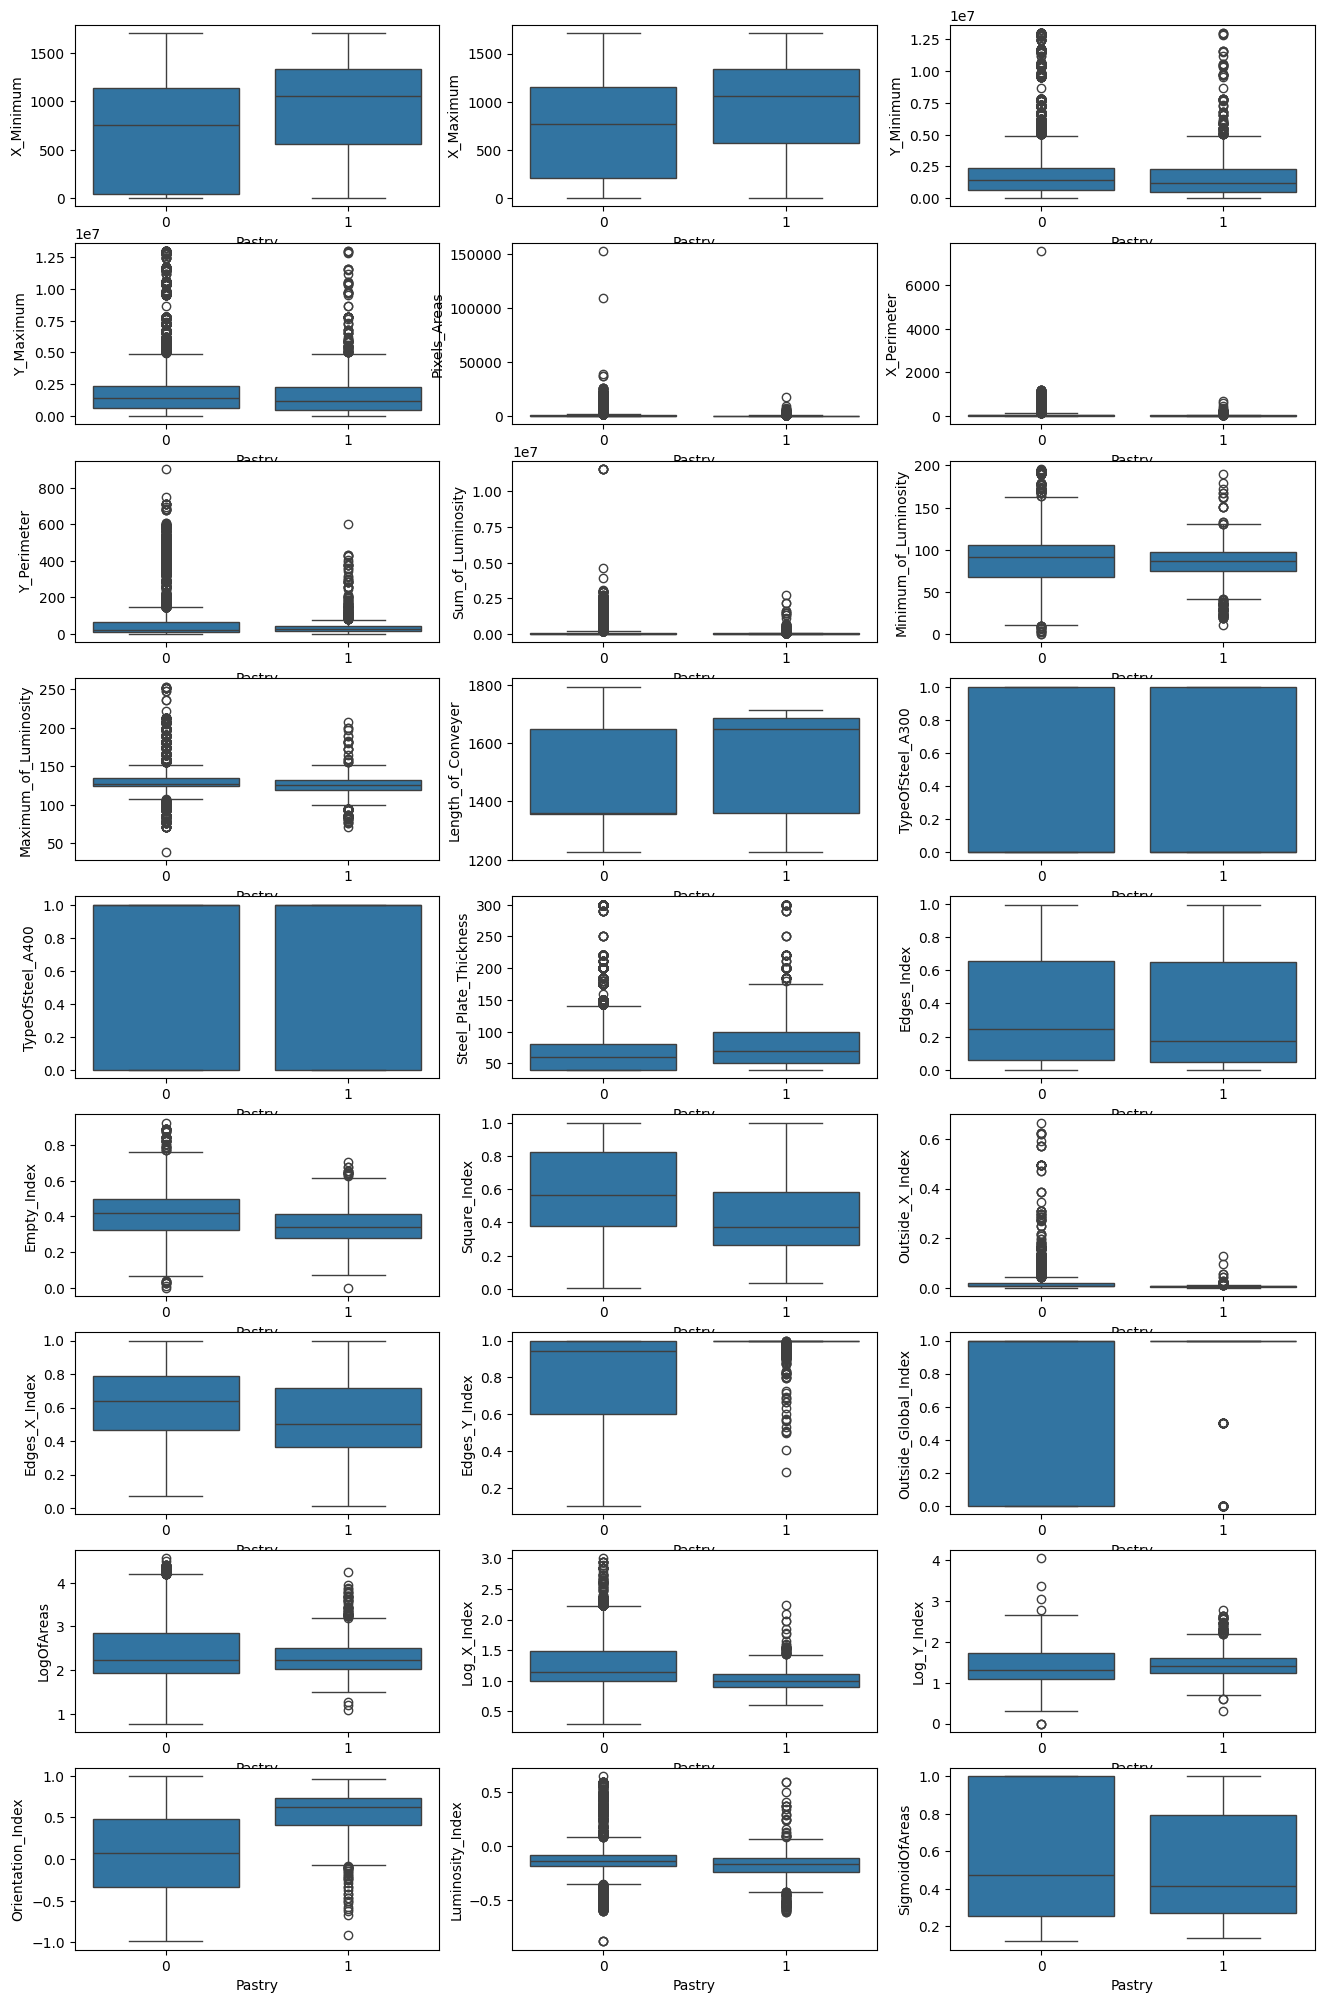

In [12]:

# Box plot of numerical features
fig, ax = plt.subplots(9, 3, figsize=(16,25))

for i in range(0, len(numerical)):
    sns.boxplot(x="Pastry",y=numerical[i],data=df_train, ax=ax[int(i/3),i % 3])

plt.show()

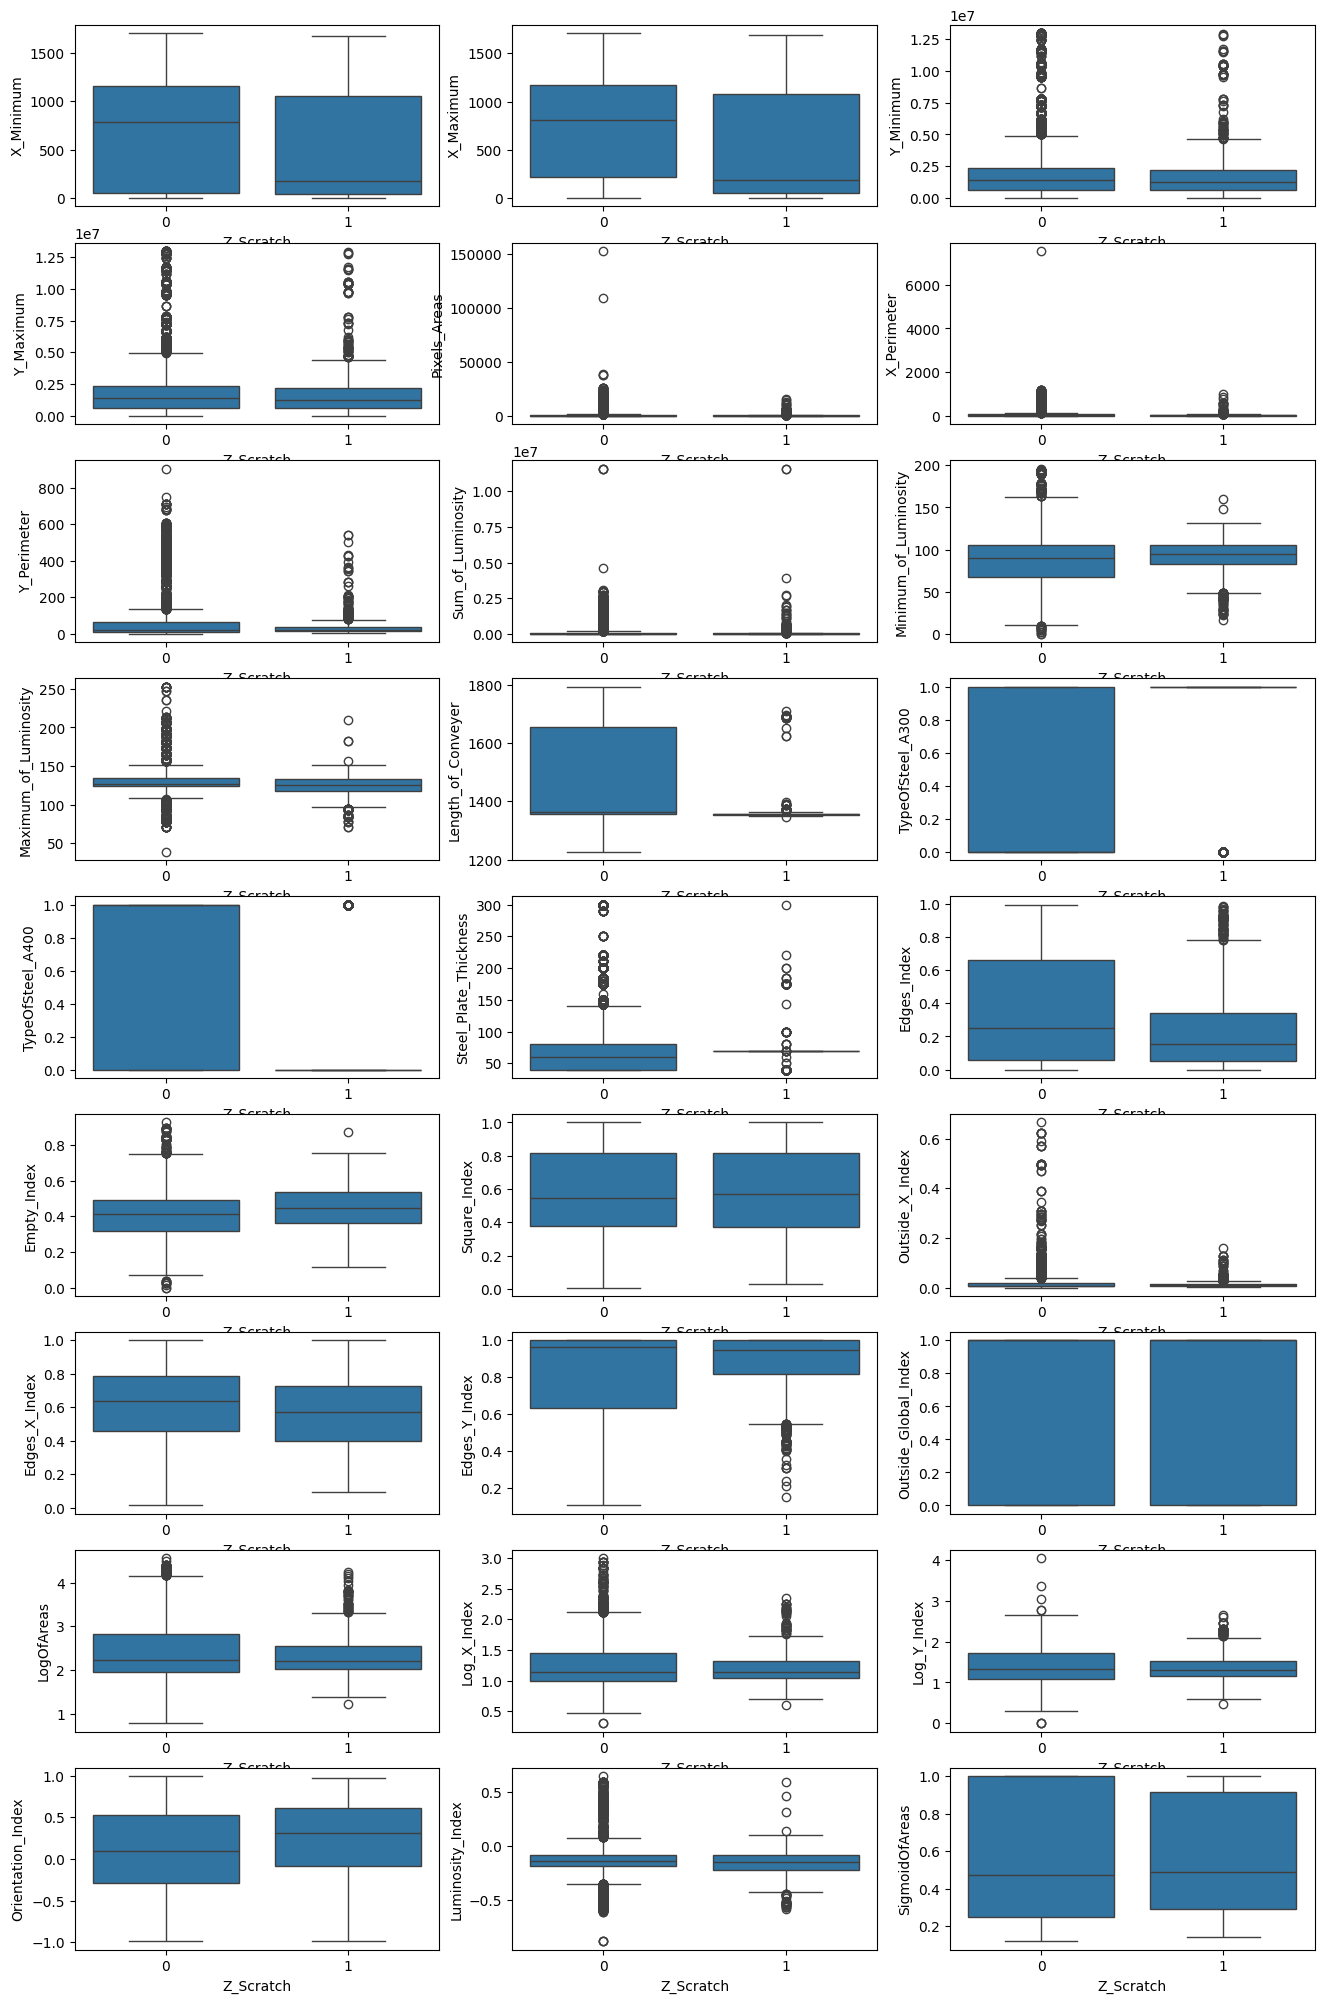

In [13]:
# Box plot of numerical features
fig, ax = plt.subplots(9, 3, figsize=(16,25))

for i in range(0, len(numerical)):
    sns.boxplot(x="Z_Scratch",y=numerical[i],data=df_train, ax=ax[int(i/3),i % 3])

plt.show()

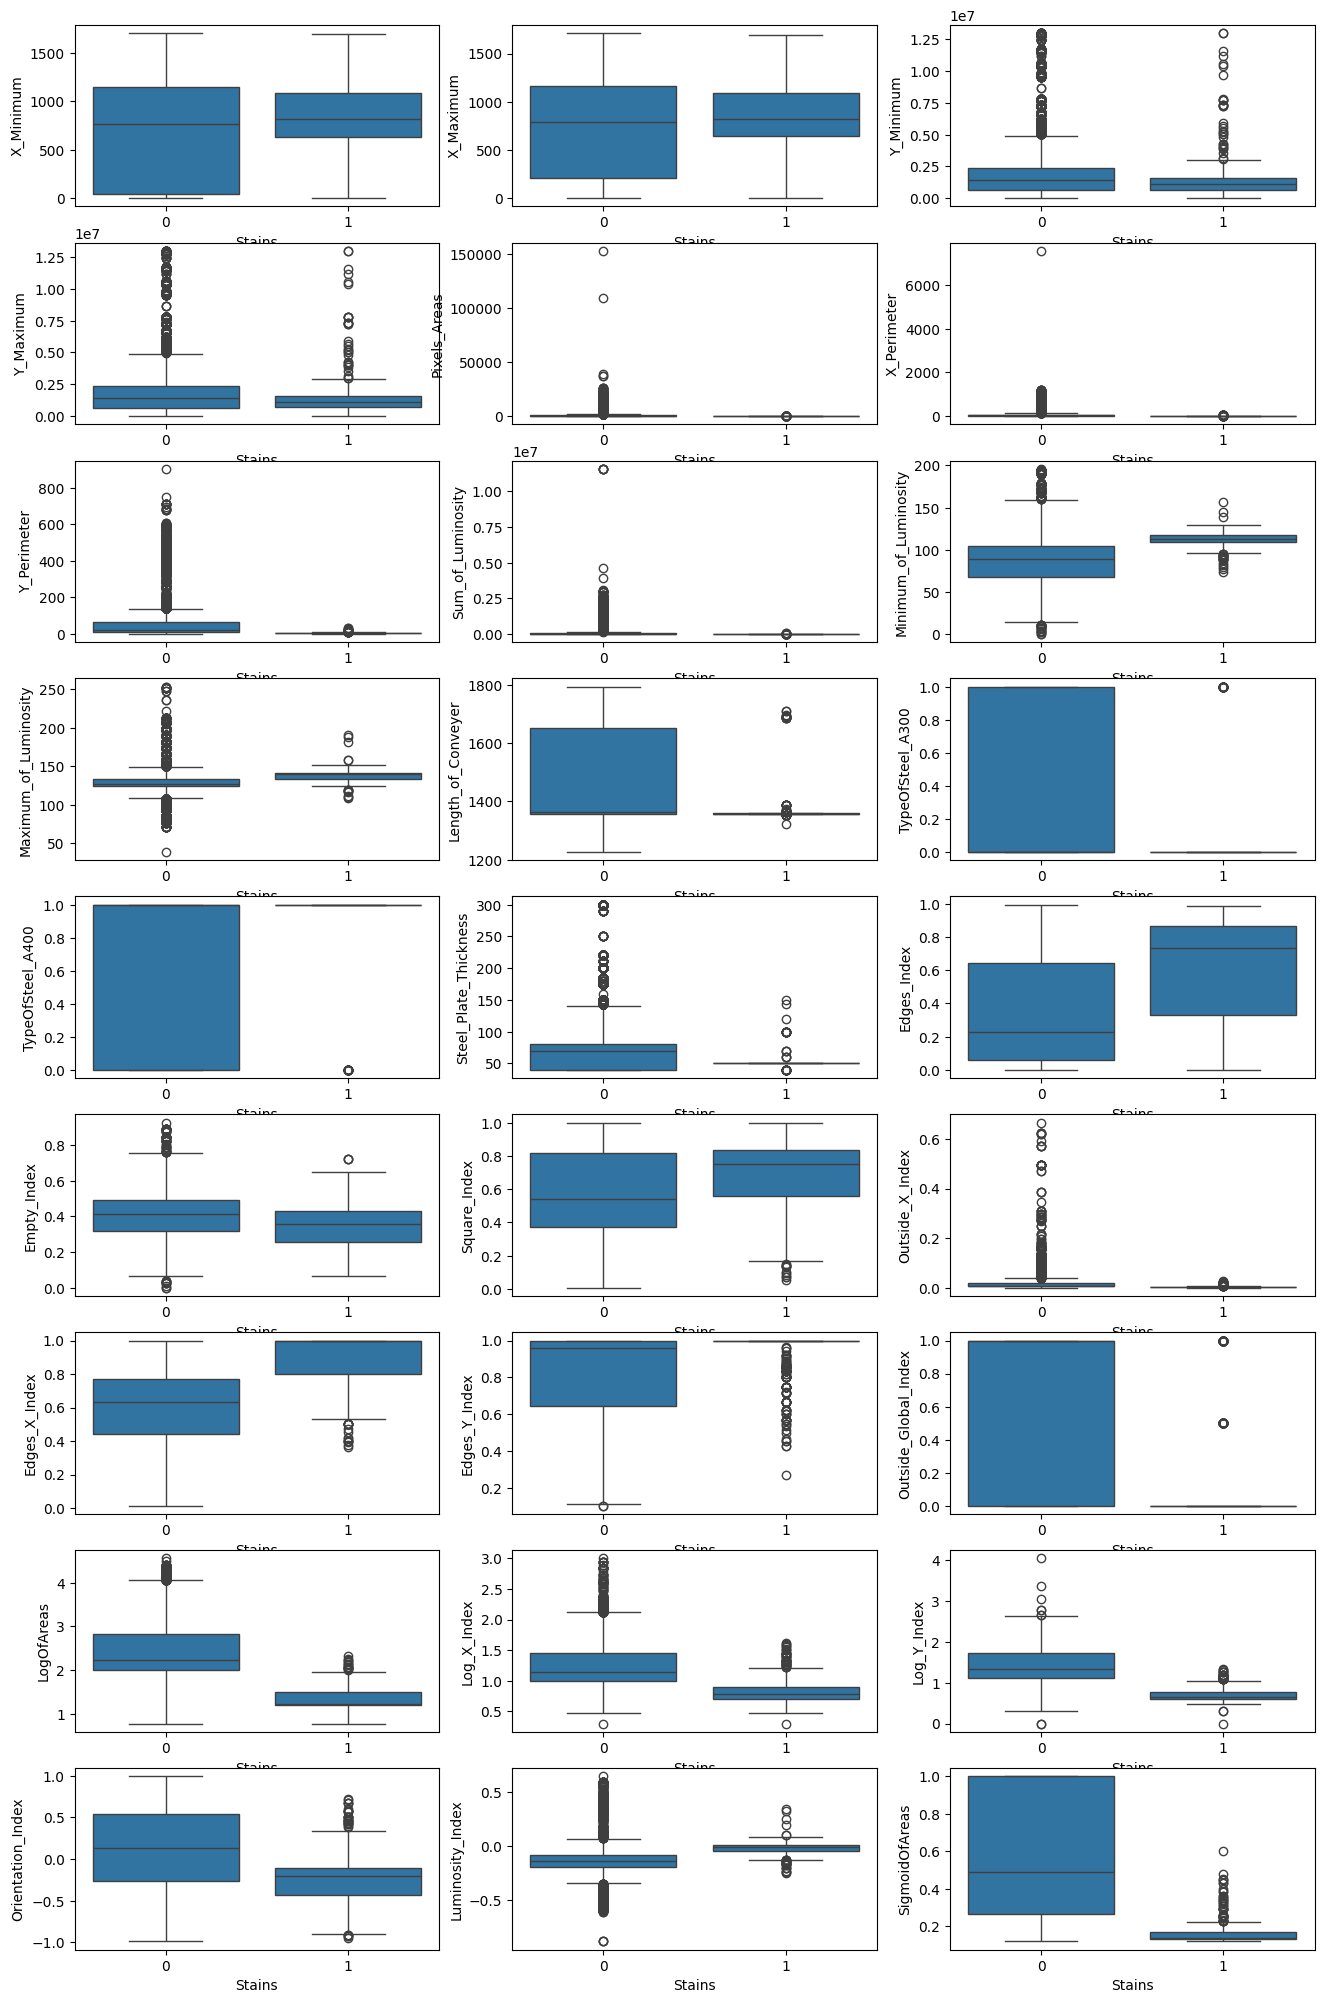

In [15]:
fig, ax = plt.subplots(9, 3, figsize=(16,25))

for i in range(0, len(numerical)):
    sns.boxplot(x="Stains",y=numerical[i],data=df_train, ax=ax[int(i/3),i % 3])

plt.show()

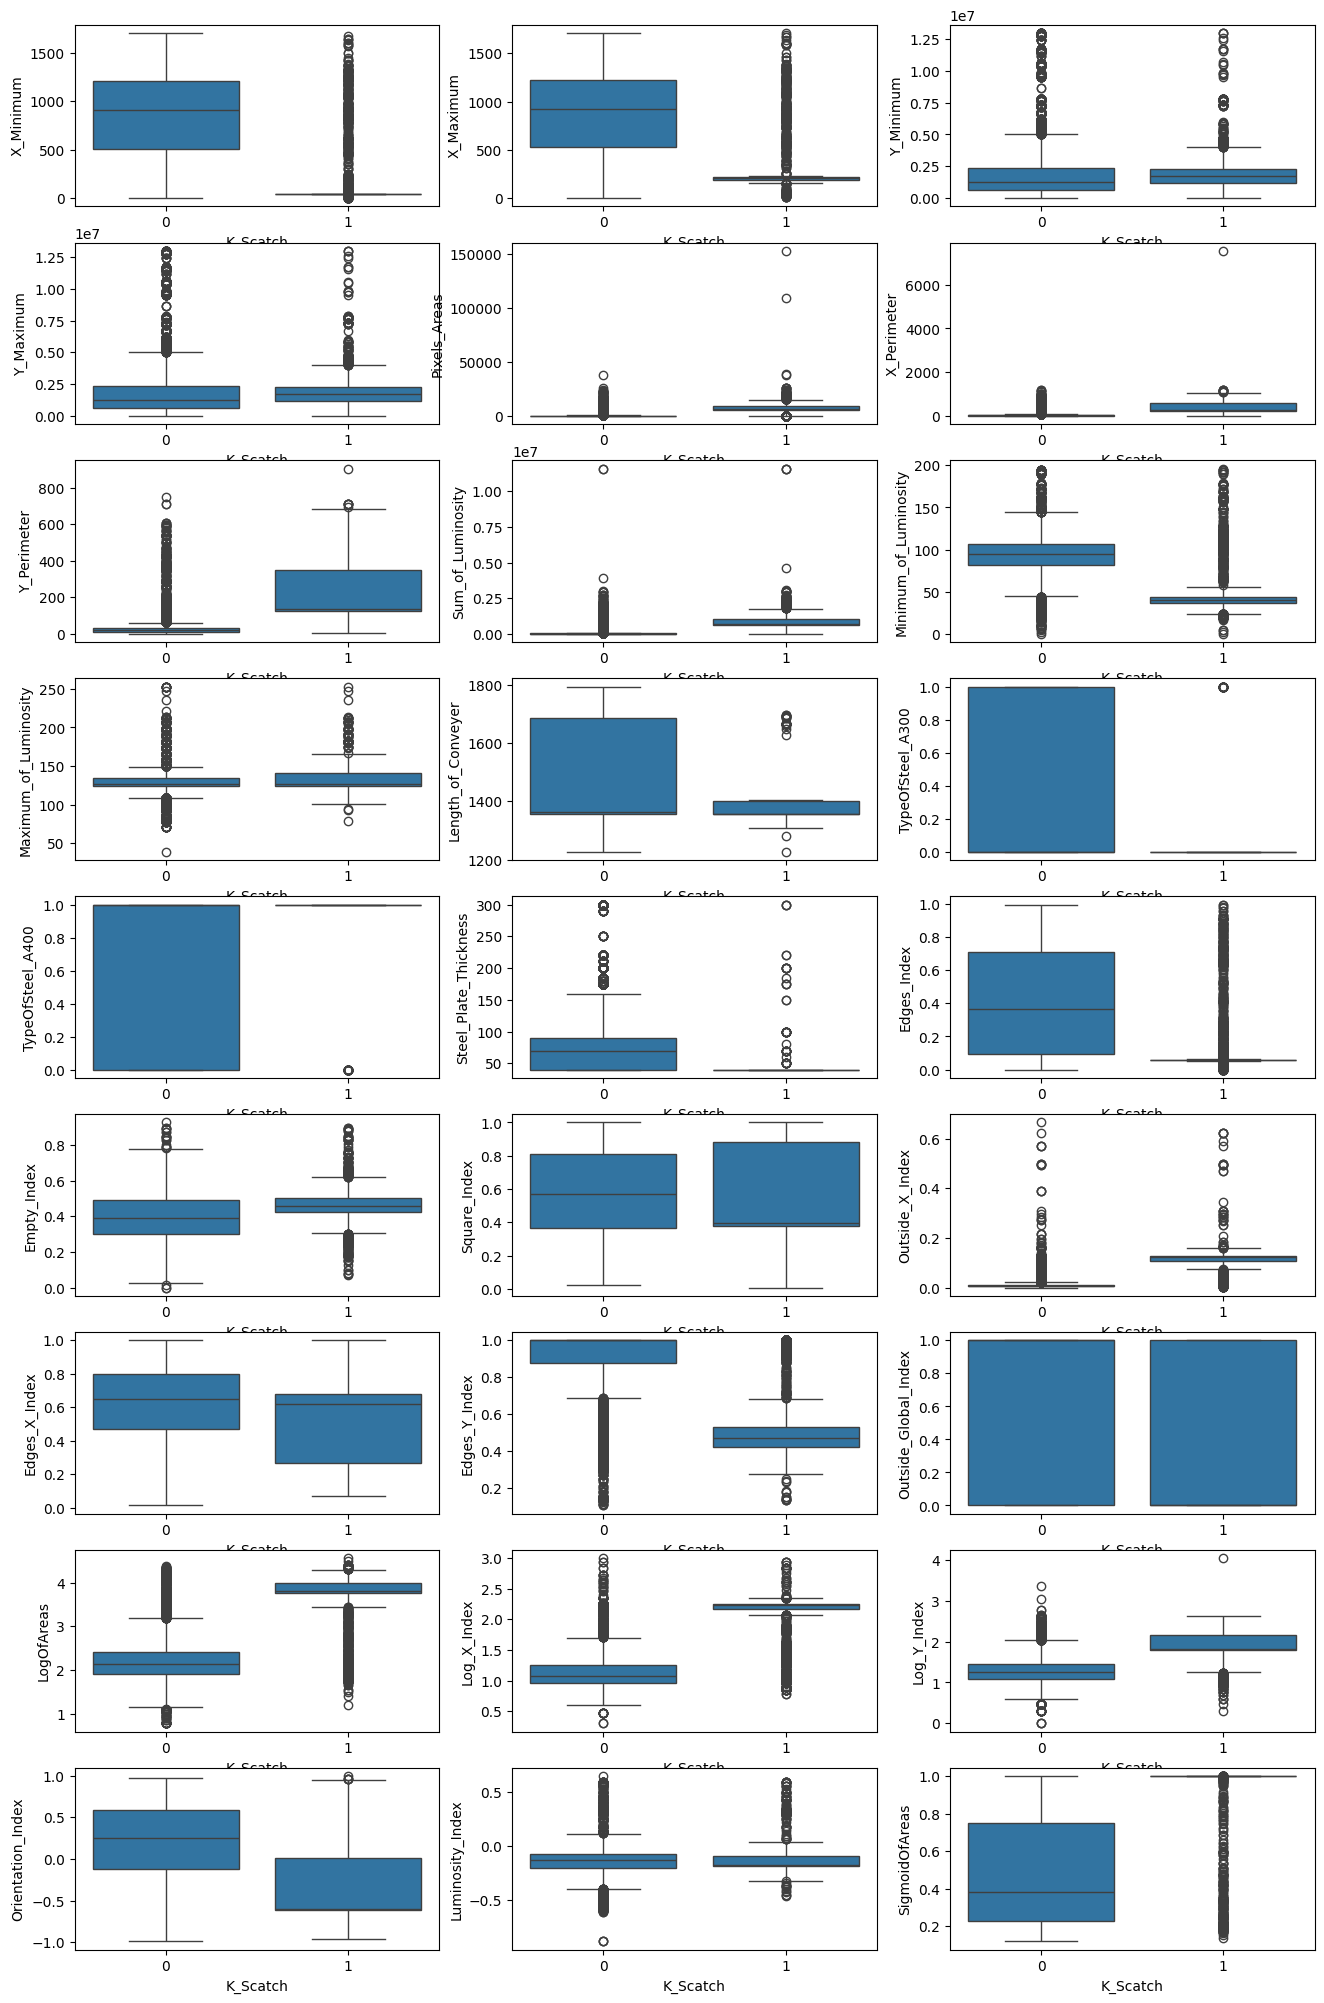

In [14]:
fig, ax = plt.subplots(9, 3, figsize=(16,25))

for i in range(0, len(numerical)):
    sns.boxplot(x="K_Scatch",y=numerical[i],data=df_train, ax=ax[int(i/3),i % 3])

plt.show()

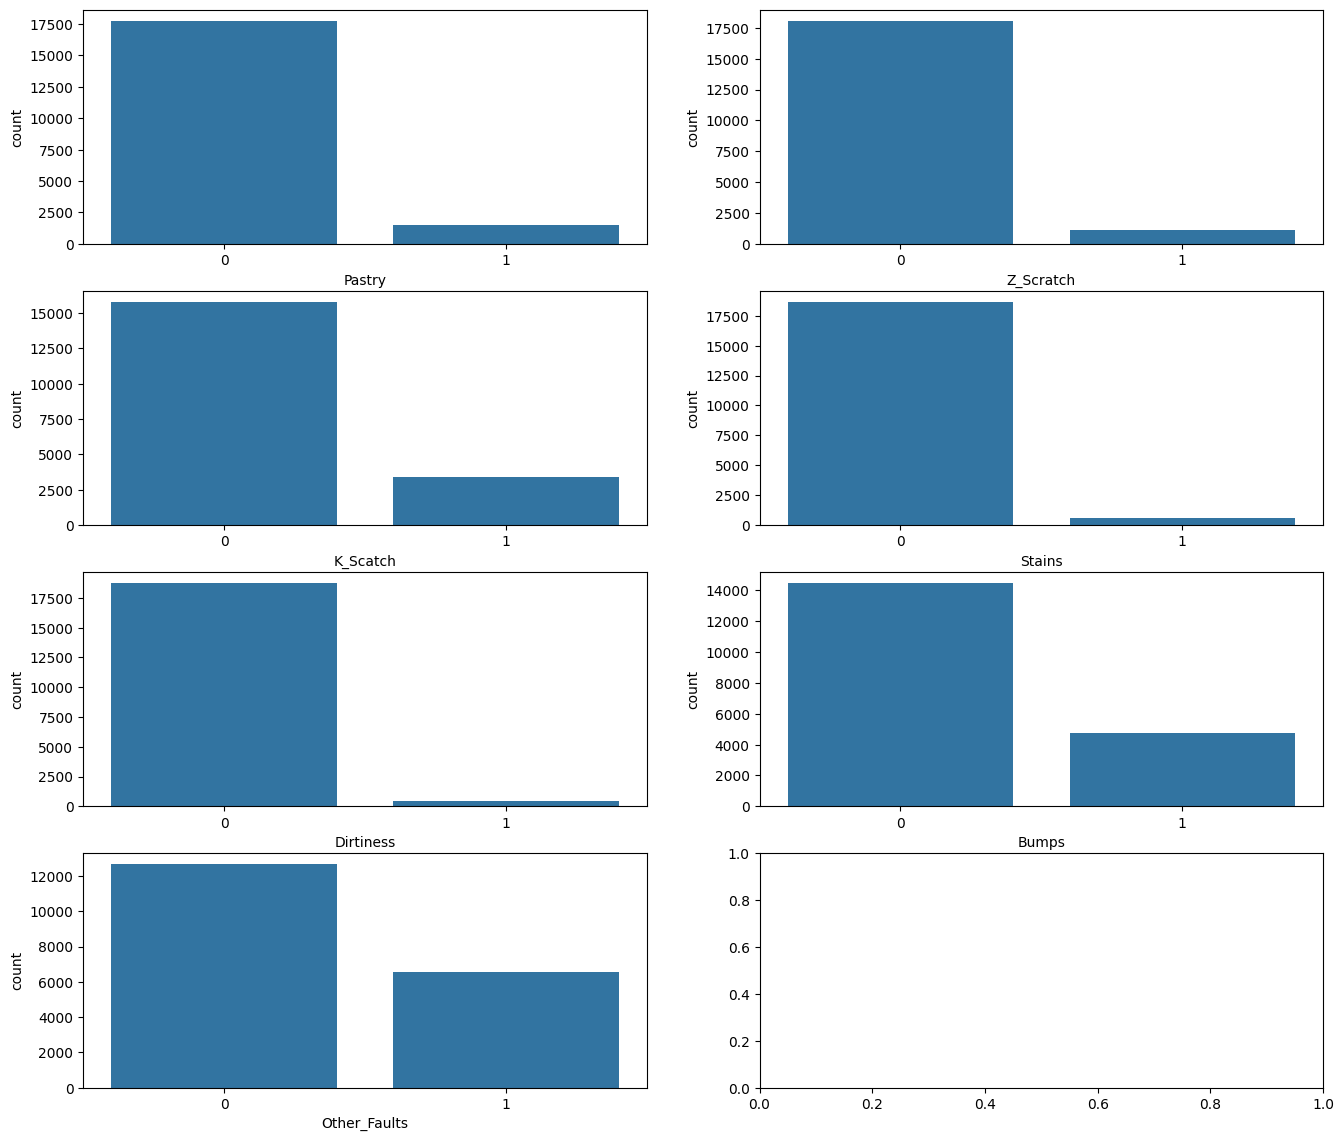

In [16]:
fig, axs = plt.subplots(4, 2, figsize=(16,14))

target = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains','Dirtiness', 'Bumps', 'Other_Faults']

# Count plot of categorical features
for feature, ax in zip(target, axs.flatten()):
    rel = sns.countplot(x=feature, data=df_train, ax=ax)

plt.show()

In [17]:
print('Original Train Data : {}'.format(df_train.shape))

df_train['X'] = df_train['X_Maximum'] - df_train['X_Minimum']
df_train['Y'] = df_train['Y_Maximum'] - df_train['Y_Minimum']
df_train['Luminosity'] = df_train['Maximum_of_Luminosity'] - df_train['Minimum_of_Luminosity']
df_train['Area_Perimeter_Ratio'] = df_train['Pixels_Areas'] / (df_train['X_Perimeter'] + df_train['Y_Perimeter'])

df_train = df_train.drop(['X_Maximum', 'X_Minimum', 'Y_Maximum', 'Y_Minimum', 'Maximum_of_Luminosity', 'Minimum_of_Luminosity', \
                         'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter'], axis=1)
print('Transformed Train Data : {}'.format(df_train.shape))

print('Original Test Data : {}'.format(df_test.shape))

df_test['X'] = df_test['X_Maximum'] - df_test['X_Minimum']
df_test['Y'] = df_test['Y_Maximum'] - df_test['Y_Minimum']
df_test['Luminosity'] = df_test['Maximum_of_Luminosity'] - df_test['Minimum_of_Luminosity']
df_test['Area_Perimeter_Ratio'] = df_test['Pixels_Areas'] / (df_test['X_Perimeter'] + df_test['Y_Perimeter'])

df_test = df_test.drop(['X_Maximum', 'X_Minimum', 'Y_Maximum', 'Y_Minimum', 'Maximum_of_Luminosity', 'Minimum_of_Luminosity', \
                       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter'], axis=1)
print('Transformed Test Data : {}'.format(df_test.shape))

Original Train Data : (19219, 35)
Transformed Train Data : (19219, 30)
Original Test Data : (12814, 28)
Transformed Test Data : (12814, 23)


In [18]:
numerical = ['X', 'Y', 'Area_Perimeter_Ratio', 'Sum_of_Luminosity', 'Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas']

In [19]:
print('Shape of Original Train Data Set: {}'.format(df_train.shape))

# Create a RobustScaler object
scaler = RobustScaler()

# Extract the index
index = df_train.index

# Fit the scaler to the data and transform it
scaler_train = scaler.fit_transform(df_train[numerical])
scaler_df_train = pd.DataFrame(scaler_train, columns=numerical)

# Reassign the index to the scaled DataFrame
scaler_df_train.index = index


df_train = df_train.drop(numerical, axis=1)
df_train = pd.concat([df_train, scaler_df_train], axis=1)

print('Shape of Scaled Train Data Set: {}'.format(scaler_df_train.shape))

# Extract the index
# index = df_test_2.index

print('Shape of Original Test Data Set: {}'.format(df_test.shape))

scaler_test = scaler.transform(df_test[numerical])
scaler_df_test = pd.DataFrame(scaler_test, columns=numerical)

df_test = df_test.drop(numerical, axis=1)
df_test = pd.concat([df_test, scaler_df_test], axis=1)

# Reassign the index to the scaled DataFrame
# scaler_df_test.index = index
print('Shape of Scaled Train Data Set: {}'.format(scaler_df_train.shape))

Shape of Original Train Data Set: (19219, 30)
Shape of Scaled Train Data Set: (19219, 22)
Shape of Original Test Data Set: (12814, 23)
Shape of Scaled Train Data Set: (19219, 22)


In [20]:
df_train.head(10)

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,X,Y,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,0,0,0,0,1,0,0,0,-0.470588,-0.357143,...,-0.288,1.088297,0.103538,-1.0,-1.182900,-0.563282,-0.991725,-0.761875,1.218433,-0.443849
1,1,0,0,0,0,0,0,1,-0.352941,0.047619,...,-0.408,-1.156540,0.103538,0.0,0.472097,-0.852805,0.652769,0.786436,-1.447926,0.638167
2,2,0,0,1,0,0,0,0,8.176471,1.142857,...,7.856,-1.197546,-1.678074,-1.0,2.112652,2.394298,1.411999,-0.151602,0.444240,0.706379
3,3,0,0,1,0,0,0,0,-0.352941,0.166667,...,-0.408,-0.782400,-0.096578,0.0,0.108954,-0.852805,0.173775,0.692682,0.943779,-0.094345
4,4,0,0,0,0,0,0,1,0.352941,0.595238,...,0.776,-1.274768,0.063225,0.0,0.625650,0.623319,0.888924,1.003241,-0.948387,0.706111
5,5,0,0,0,0,0,0,1,0.588235,1.333333,...,-0.336,-0.272374,0.103538,0.0,0.443443,-0.444831,0.147677,0.598180,-0.427650,0.538730
6,6,0,0,0,0,0,1,0,-0.176471,158373.047619,...,0.120,0.233164,0.103538,0.0,0.094396,0.069541,0.000000,0.255205,-0.065438,0.064728
7,7,1,0,0,0,0,0,0,0.000000,0.142857,...,0.376,-0.202933,-0.714617,0.0,0.606470,0.542652,0.690165,-0.094003,-1.138249,0.627044
8,8,0,0,0,0,0,0,0,0.000000,-0.261905,...,0.648,0.489674,-0.621520,-1.0,-0.258348,0.542652,-0.865691,-0.969705,1.595392,-0.151166
9,9,0,0,0,0,0,1,0,0.000000,-0.380952,...,-0.464,0.589345,0.103538,0.0,-0.572501,-1.036393,-0.232495,0.443336,0.182488,-0.446127


In [21]:
X = df_train.drop(target, axis=1)
X = X.drop(['id'], axis=1)

# y data set for target label
y= df_train[target]

In [22]:
def data_split (X, y, i):
    X_train, X_test, y_train, y_test = train_test_split(X, y[target[i]], test_size=0.3)

    print('Shape of train : {}'.format(X_train.shape))
    print('Shape of test : {}'.format(y_train.shape))
    
    return X_train, X_test, y_train, y_test

In [23]:
def oversampling (X, y):
    smote = SMOTE(sampling_strategy={0: 15000, 1: 15000})

    X_smote, y_smote = smote.fit_resample(X_train, y_train)

    return X_smote, y_smote 
   

In [24]:
def kBestFeature (X, y, threshold, t_score):

    print("="*50)
    print("KBest Feature Selection by Significance to Targets for {}".format(target[0]))
    print("="*50)

    # Initiate the SelectKBest function
    # For regression tasks: f_regression, mutual_info_regression
    # For classification tasks: chi2, f_classif, mutual_info_classif
    fs = SelectKBest(score_func=f_classif, k=len(X.columns))

    # apply feature selection
    X_selected = fs.fit_transform(X, y.values)
    print('Befoe the SelectKBest = {}'.format(X.shape))

    new_features = [] # The list of features less than the p-values
    drop_features = [] # The list of features higher than the p-values

    for i in range(len(X_train.columns)):
    #     print('Feature {}: {:.3f} with p-value {:.3f}'.format(X_train.columns[i], fs.scores_[i], fs.pvalues_[i]))
        if fs.pvalues_[i] <= threshold and fs.scores_[i] >= t_score:
            new_features.append(X.columns[i])
        else:
            drop_features.append(X.columns[i])

    X_selected_final =  pd.DataFrame(X_selected)
    X_selected_final.columns = X.columns
    #    print(X_selected_final.shape)
    X_selected_final = X_selected_final[new_features]
    #    print(X_selected_final.shape)

    print('=' * 30)
    print('After the SelectKBest = {}'.format(X_selected_final.shape))
    print('Drop-out Features = {}'.format(len(drop_features)))
    
    return X_selected_final

In [25]:
def modelling (X, y):
    
    # XGBoost
    # A parameter grid for XGBoost
    
    # Parameter Setup
    p_folds = 3
    p_iter = 1000
    p_estimators = 300
    p_learning_rate = 0.01

    params = {
            'max_depth': randint(5, 7),
            'gamma': uniform(0.0, 0.5),
            'subsample': uniform(0.6, 1.0),
            'colsample_bytree': uniform(0.6, 1.0),
            'reg_alpha': uniform(0.2, 1.0),
            'reg_lambda': uniform(0.2, 1.0),
            'min_child_weight': randint(3, 7),
            'scale_pos_weight': randint(1, 10)     
            }    
    
    xgb = XGBClassifier(learning_rate=p_learning_rate, n_estimators = p_estimators, objective='binary:logistic')    
    xgb.fit(X,y)

    return xgb

In [35]:
i = 1  # Selecting the first target as an example
X_train, X_test, y_train, y_test = data_split(X, y,i)
X_smote, y_smote = oversampling(X_train, y_train)
X_selected = kBestFeature(X_smote, y_smote, 0.05, 4)

# Ensuring that test set has the same columns as the selected features
X_test_selected = X_test[X_selected.columns]

model = modelling(X_selected, y_smote)
y_pred = model.predict(X_test_selected)

print("Model performance for target {}: ".format(target[i]))
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))

Shape of train : (13453, 22)
Shape of test : (13453,)
KBest Feature Selection by Significance to Targets for Pastry
Befoe the SelectKBest = (30000, 22)
After the SelectKBest = (30000, 20)
Drop-out Features = 2
Model performance for target Z_Scratch: 
Accuracy:  0.9361775927852931
F1 Score:  0.6085106382978723
Precision:  0.49310344827586206
Recall:  0.7944444444444444
